In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [29]:
# Load data from Excel
all_df = pd.read_excel('Folds5x2_pp.xlsx')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [34]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [35]:
# Separate the target (PE) from the feature set
X = all_df.drop(columns='PE')  # Input variables (AT, V, AP, RH)
y = all_df['PE']  

In [36]:
# Standardize features to mean=0 and variance=1 for better performance with PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
# Apply PCA for dimensionality reduction, reducing features to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [38]:
# Split PCA-reduced data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [40]:
# Function to train model, predict, and create scatter plot for model predictions vs actual values
def train_and_plot(model, name):
    # Fit the model to the training data
    model.fit(X_train_pca, y_train)
    
    # Generate predictions on the test data
    predictions = model.predict(X_test_pca)
    
    # Create a scatter plot for actual vs predicted values
    plt.scatter(y_test, predictions, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
    plt.title(f'{name} Predictions vs. Actual')
    plt.xlabel('Actual Energy Output (PE)')
    plt.ylabel('Predicted Energy Output')
    plt.show()

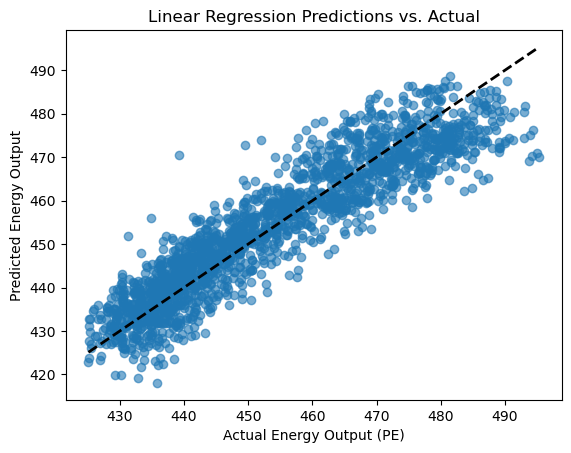

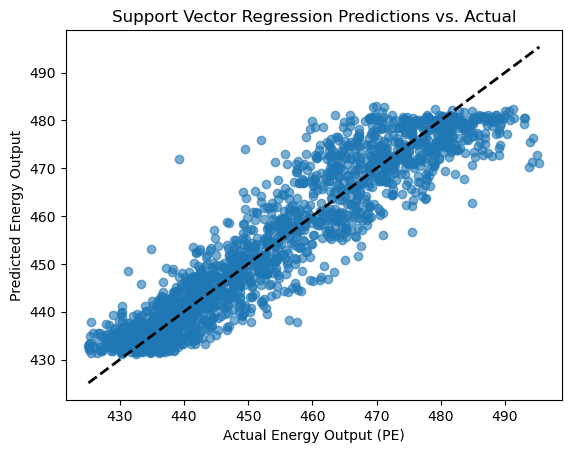

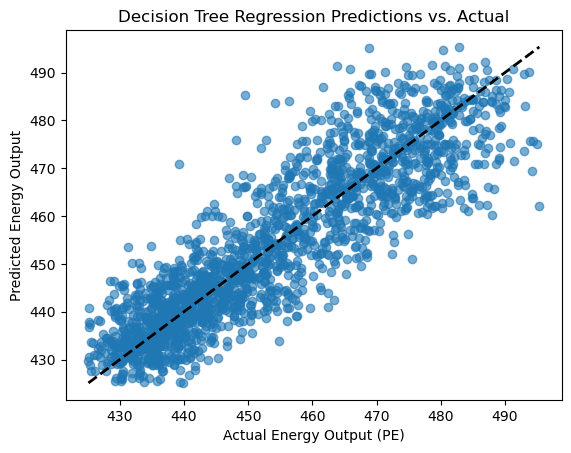

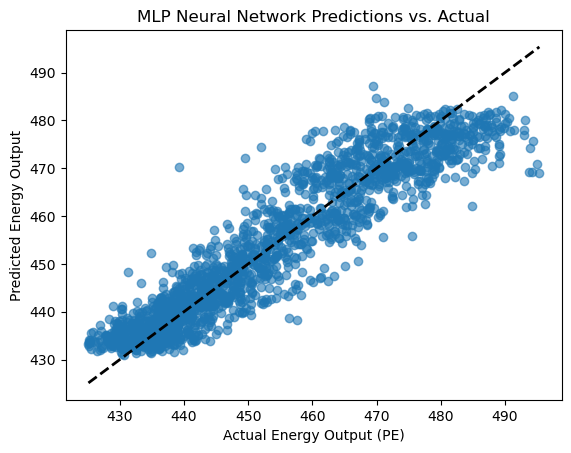

In [41]:
# Instantiate models and visualize predictions
lr_model = LinearRegression()
train_and_plot(lr_model, "Linear Regression")

svm_model = SVR(kernel='rbf')
train_and_plot(svm_model, "Support Vector Regression")

dt_model = DecisionTreeRegressor(random_state=42)
train_and_plot(dt_model, "Decision Tree Regression")

mlp_model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
train_and_plot(mlp_model, "MLP Neural Network")

In [42]:
# Function to compute mean and standard deviation of MSE via cross-validation
def compute_cv_mse(model, X_train, y_train):
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    return -cv_scores.mean(), cv_scores.std()

In [43]:
# Calculate and print cross-validated MSE for each model
lr_mse, lr_std = compute_cv_mse(lr_model, X_train_pca, y_train)
print(f"Linear Regression - Mean Squared Error: {lr_mse:.3f}, Std Dev: {lr_std:.3f}")

svm_mse, svm_std = compute_cv_mse(svm_model, X_train_pca, y_train)
print(f"Support Vector Regression - Mean Squared Error: {svm_mse:.3f}, Std Dev: {svm_std:.3f}")

dt_mse, dt_std = compute_cv_mse(dt_model, X_train_pca, y_train)
print(f"Decision Tree - Mean Squared Error: {dt_mse:.3f}, Std Dev: {dt_std:.3f}")

mlp_mse, mlp_std = compute_cv_mse(mlp_model, X_train_pca, y_train)
print(f"MLP Neural Network - Mean Squared Error: {mlp_mse:.3f}, Std Dev: {mlp_std:.3f}")

Linear Regression - Mean Squared Error: 45.981, Std Dev: 1.546
Support Vector Regression - Mean Squared Error: 37.935, Std Dev: 1.673
Decision Tree - Mean Squared Error: 70.193, Std Dev: 4.026
MLP Neural Network - Mean Squared Error: 37.396, Std Dev: 1.643


In [44]:
# Visualize model performance using a bar chart for MSE comparison
mse_means = [lr_mse, svm_mse, dt_mse, mlp_mse]
mse_stds = [lr_std, svm_std, dt_std, mlp_std]
models = ['Linear Regression', 'SVM', 'Decision Tree', 'MLP']


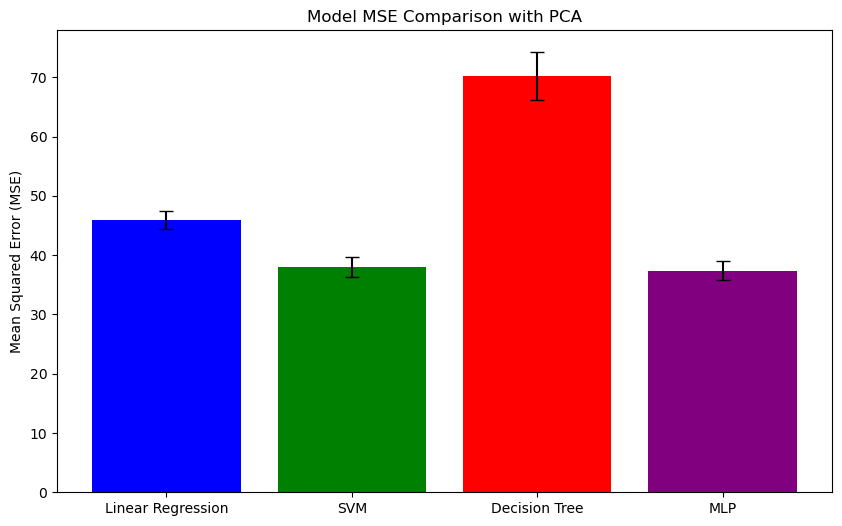

In [45]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_means, yerr=mse_stds, capsize=5, color=['blue', 'green', 'red', 'purple'])
plt.title('Model MSE Comparison with PCA')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()